In [2]:
import torch
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from segment_anything import sam_model_registry, SamPredictor
from groundingdino.models import build_model
from groundingdino.util.inference import load_model, predict

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-k6_4fpua
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-k6_4fpua
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-szjpbf_8
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-szjpbf_8
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 856dde20aee659246248e20734ef9ba5214f5e44
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 19.

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-hl55_mjz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-hl55_mjz
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=24644d85554561756e7074948009e824d50438592a2e87a151b9e98ac1f2f635
  Stored in directory: /tmp/pip-ephem-wheel-cache-rg9eumcd/wheels/29/82/ff/04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment_anything


In [4]:
!wget -O /content/drive/MyDrive/sam_vit_h_4b8939.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2025-10-03 11:21:13--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.215.36, 99.84.215.124, 99.84.215.7, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.215.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘/content/drive/MyDrive/sam_vit_h_4b8939.pth’

/content/drive/MyDr 100%[===================>]   2.39G  68.4MB/s    in 37s     

2025-10-03 11:21:50 (65.4 MB/s) - ‘/content/drive/MyDrive/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



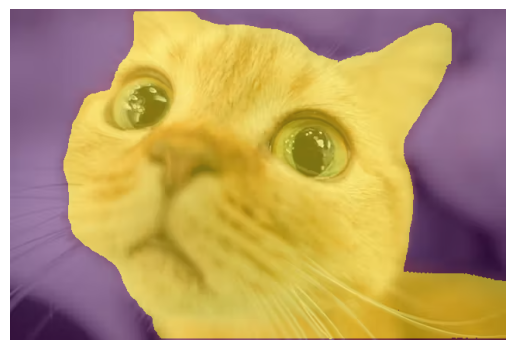

In [9]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import torch
import cv2
import matplotlib.pyplot as plt

sam_checkpoint = "/content/drive/MyDrive/sam_vit_h_4b8939.pth"
sam_model_type = "vit_h"
sam = sam_model_registry[sam_model_type](checkpoint=sam_checkpoint)
sam.to("cuda")

mask_generator = SamAutomaticMaskGenerator(sam)


img_path = "/cat.jpg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image_rgb)


plt.imshow(image_rgb)
plt.imshow(masks[0]['segmentation'], alpha=0.5)
plt.axis('off')
plt.show()
